In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_train.csv')

In [3]:
df.dropna(inplace=True,axis=0)

In [4]:
df.drop(columns=['Index'], inplace=True)

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr().abs()

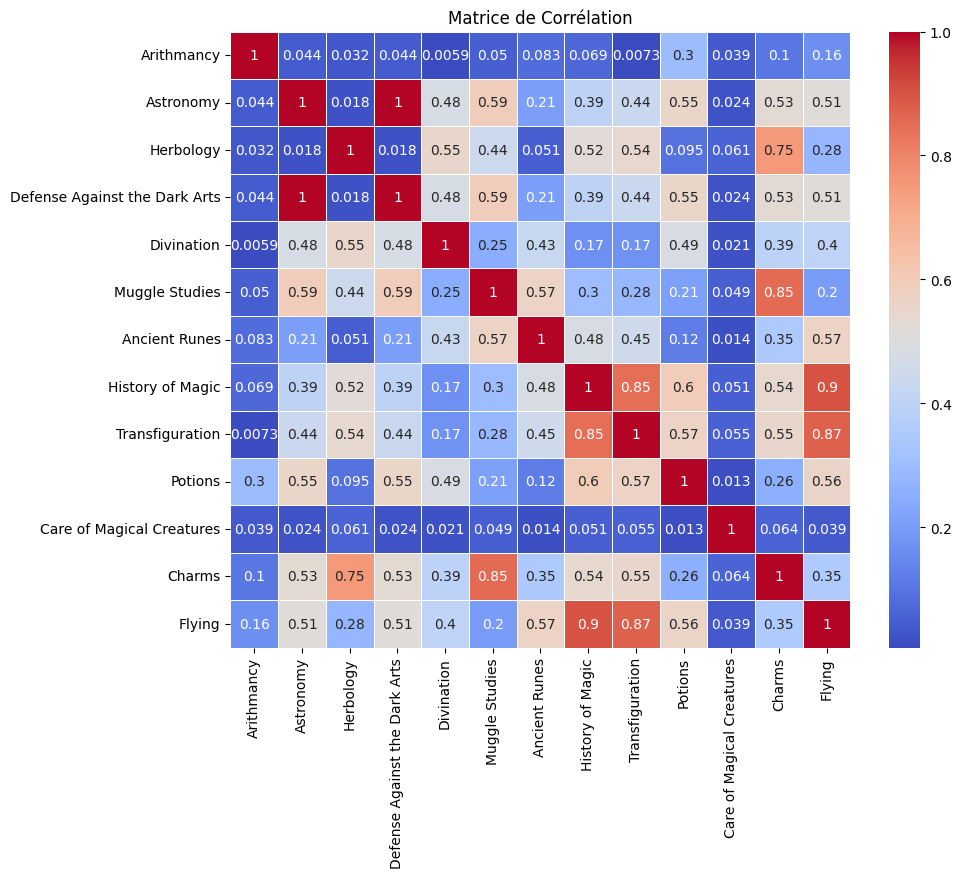

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

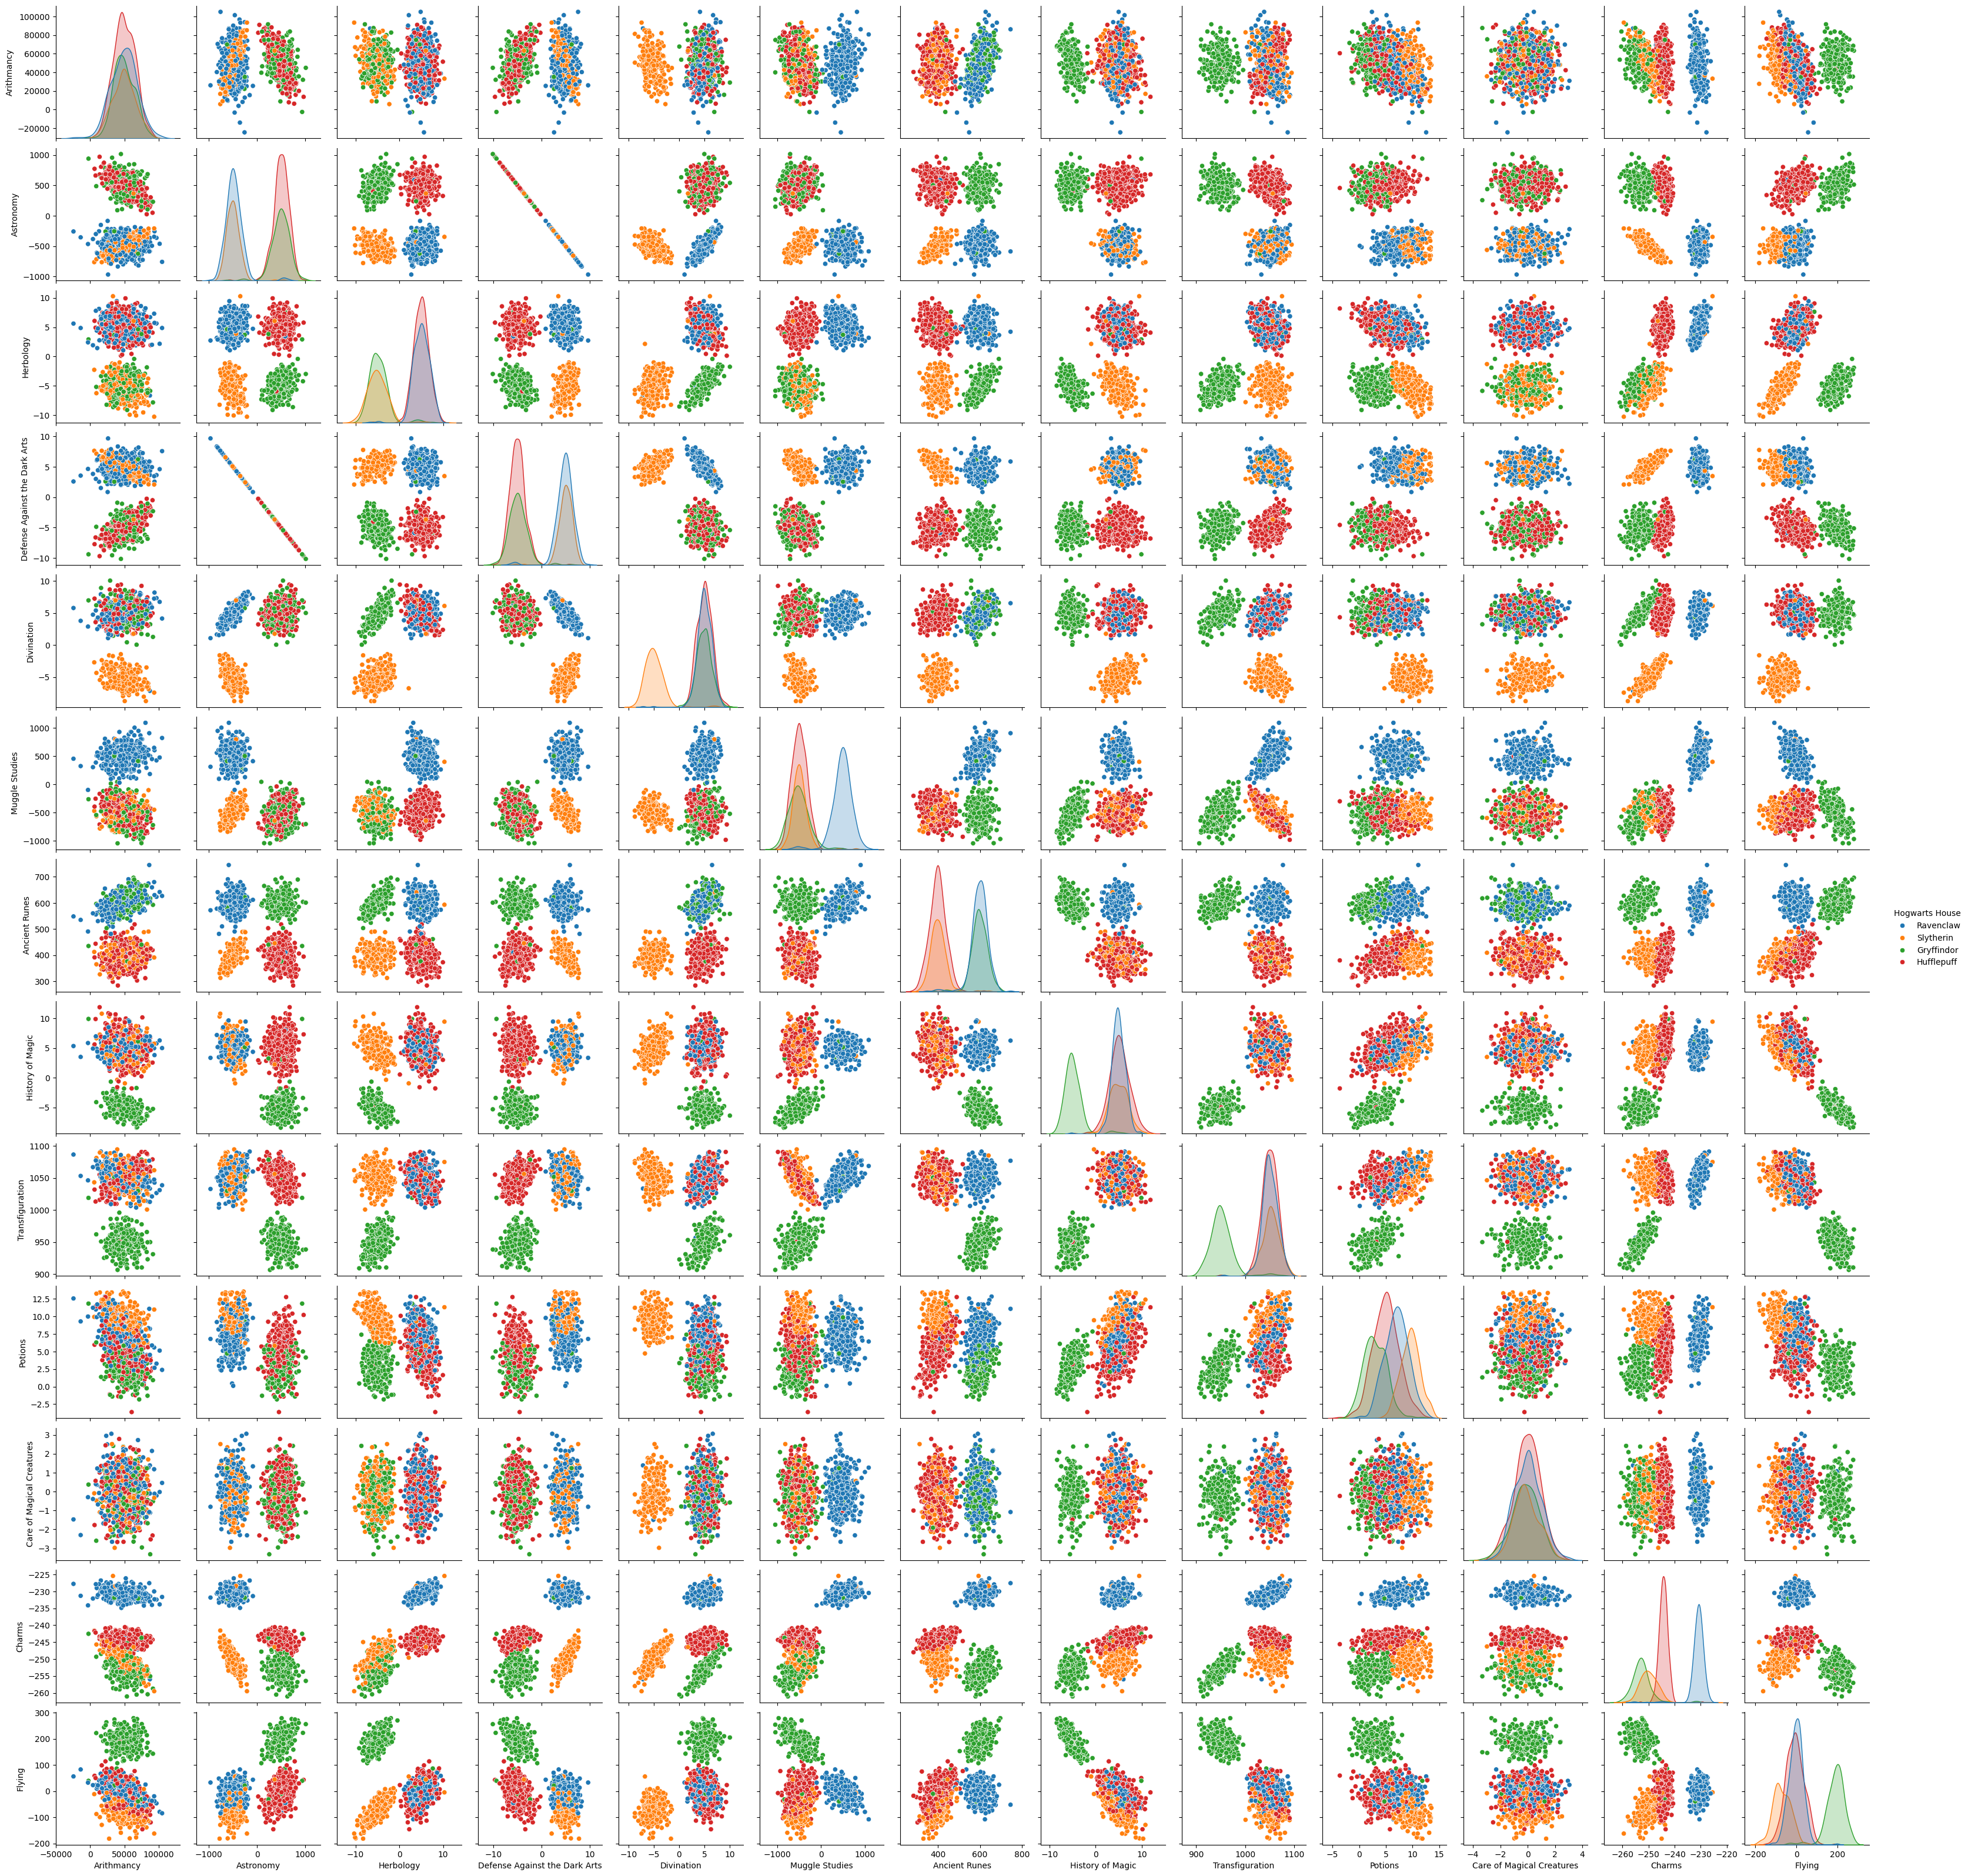

In [13]:
sns.pairplot(df, hue="Hogwarts House")  # Remplace "target" par ta variable cible
plt.show()

In [ ]:
class PandasSeries(pd.core.series.Series):
    def __init__(self, *args, **kwargs):
        super(PandasSeries, self).__init__(*args, **kwargs)

    def custom_mean(self):
        return self.mean()

In [6]:
type(df['Hogwarts House'])

pandas.core.series.Series

In [26]:
df.columns

Index(['Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand',
       'Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

In [29]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_columns.append('Hogwarts House')
print(numerical_columns)


['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying', 'Hogwarts House']


In [31]:
tmp = df[numerical_columns]
df_grpby = tmp.groupby('Hogwarts House').mean()
df_grpby

Arithmancy   Astronomy  Herbology  \
Hogwarts House                                        
Gryffindor      49502.371648  491.148782  -4.710794   
Hufflepuff      49703.855422  504.074303   4.964269   
Ravenclaw       49291.558405 -478.665508   5.033146   
Slytherin       49184.303571 -496.549272  -4.952131   

                Defense Against the Dark Arts  Divination  Muggle Studies  \
Hogwarts House                                                              
Gryffindor                          -4.911488    4.924249     -511.003929   
Hufflepuff                          -5.040743    5.031308     -494.955407   
Ravenclaw                            4.786655    4.967860      480.527967   
Slytherin                            4.965493   -4.894817     -485.443228   

                Ancient Runes  History of Magic  Transfiguration   Potions  \
Hogwarts House                                                               
Gryffindor         597.082582         -4.797438       952.031616  2.993913   
Hufflepuff         399.061437          5.127574      1049.611636  4.999121   
Ravenclaw          597.264159          4.940931      1050.236375  7.005852   
Slytherin          400.543761          4.982776      1052.037499  9.564531   

                Care of Magical Creatures      Charms      Flying  
Hogwarts House                                                     
Gryffindor                      -0.183102 -252.651084  188.469272  
Hufflepuff                      -0.035420 -244.315379   -7.759639  
Ravenclaw                        0.005144 -231.103187   -3.218319  
Slytherin                       -0.088281 -249.778773  -71.121562

In [37]:
description = df.groupby('Hogwarts House').describe()
mean_only = description.loc[:, (slice(None), 'mean')]
mean_only

Arithmancy   Astronomy Herbology  \
                        mean        mean      mean   
Hogwarts House                                       
Gryffindor      49502.371648  491.148782 -4.710794   
Hufflepuff      49703.855422  504.074303  4.964269   
Ravenclaw       49291.558405 -478.665508  5.033146   
Slytherin       49184.303571 -496.549272 -4.952131   

               Defense Against the Dark Arts Divination Muggle Studies  \
                                        mean       mean           mean   
Hogwarts House                                                           
Gryffindor                         -4.911488   4.924249    -511.003929   
Hufflepuff                         -5.040743   5.031308    -494.955407   
Ravenclaw                           4.786655   4.967860     480.527967   
Slytherin                           4.965493  -4.894817    -485.443228   

               Ancient Runes History of Magic Transfiguration   Potions  \
                        mean             mean            mean      mean   
Hogwarts House                                                            
Gryffindor        597.082582        -4.797438      952.031616  2.993913   
Hufflepuff        399.061437         5.127574     1049.611636  4.999121   
Ravenclaw         597.264159         4.940931     1050.236375  7.005852   
Slytherin         400.543761         4.982776     1052.037499  9.564531   

               Care of Magical Creatures      Charms      Flying  
                                    mean        mean        mean  
Hogwarts House                                                    
Gryffindor                     -0.183102 -252.651084  188.469272  
Hufflepuff                     -0.035420 -244.315379   -7.759639  
Ravenclaw                       0.005144 -231.103187   -3.218319  
Slytherin                      -0.088281 -249.778773  -71.121562

In [35]:
type(df.groupby('Astronomy'))

pandas.core.groupby.generic.DataFrameGroupBy

In [36]:
type(df)

pandas.core.frame.DataFrame

In [42]:
class DataFrameCustom(pd.DataFrame):
    def __init__(self, data):
        super().__init__(data)

    def custom_describe(self):
        description = {}
        for column in self.select_dtypes(include=['float64', 'int64']).columns:
            description[column] = {
                'count': self[column].count(),
                'mean': self[column].mean(),
                'std': self[column].std(),
                'min': self[column].min(),
                '25%': self[column].quantile(0.25),
                '50%': self[column].median(),
                '75%': self[column].quantile(0.75),
                'max': self[column].max()
            }
        return pd.DataFrame(description)

In [47]:
class DataFrameGroupByCustom(pd.core.groupby.DataFrameGroupBy):
    def __init__(self, obj, *args, **kwargs):
        super().__init__(obj, *args, **kwargs)

    def custom_describe(self):
        description = {}
        for column in self.select_dtypes(include=['float64', 'int64']).columns:
            description[column] = {
                'count': self[column].count(),
                'mean': self[column].mean(),
                'std': self[column].std(),
                'min': self[column].min(),
                '25%': self[column].quantile(0.25),
                '50%': self[column].median(),
                '75%': self[column].quantile(0.75),
                'max': self[column].max()
            }
        return pd.DataFrame(description)

In [51]:
import pandas as pd
from pandas.core.groupby.generic import DataFrameGroupBy

class DataFrameGroupByCustom(DataFrameGroupBy):
    def __init__(self, obj, *args, **kwargs):
        super().__init__(obj, *args, **kwargs)

    def custom_describe(self):
        description = {}
        for column in self.obj.select_dtypes(include=['float64', 'int64']).columns:
            group = self[column]
            description[column] = {
                'count': group.count(),
                'mean': group.mean(),
                'std': group.std(),
                'min': group.min(),
                '25%': group.quantile(0.25),
                '50%': group.median(),
                '75%': group.quantile(0.75),
                'max': group.max()
            }
        return pd.DataFrame(description)

# Exemple d'utilisation
data = {
    'Hogwarts House': ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'],
    'Score': [85, 90, 78, 92, 88, 85]
}
df = pd.DataFrame(data)

# Utilisation de la classe personnalisée
grouped = DataFrameGroupByCustom(df, 'Hogwarts House')
description = grouped.custom_describe()
description

Score
count  Hogwarts House
Gryffindor    2
Hufflepuff    2...
mean   Hogwarts House
Gryffindor    86.5
Hufflepuff  ...
std    Hogwarts House
Gryffindor    2.121320
Hufflepu...
min    Hogwarts House
Gryffindor    85
Hufflepuff    ...
25%    Hogwarts House
Gryffindor    85.75
Hufflepuff ...
50%    Hogwarts House
Gryffindor    86.5
Hufflepuff  ...
75%    Hogwarts House
Gryffindor    87.25
Hufflepuff ...
max    Hogwarts House
Gryffindor    88
Hufflepuff    ...

In [13]:
description = df.groupby('Hogwarts House').describe()
mean_only = description.loc[:, (slice(None), 'std')]
mean_only

Arithmancy   Astronomy Herbology  \
                         std         std       std   
Hogwarts House                                       
Gryffindor      15137.524889  194.701731  2.344435   
Hufflepuff      15595.268510  159.791303  1.772203   
Ravenclaw       19107.607027  188.659992  1.921617   
Slytherin       16481.066706  149.584718  2.545890   

               Defense Against the Dark Arts Divination Muggle Studies  \
                                         std        std            std   
Hogwarts House                                                           
Gryffindor                          1.947017   1.484282     236.114707   
Hufflepuff                          1.597913   1.439173     176.227011   
Ravenclaw                           1.886600   1.529258     230.206092   
Slytherin                           1.495847   2.046731     172.232735   

               Ancient Runes History of Magic Transfiguration   Potions  \
                         std              std             std       std   
Hogwarts House                                                            
Gryffindor         39.360951         2.223386       24.508553  2.141069   
Hufflepuff         40.511375         2.194989       16.139960  2.441503   
Ravenclaw          42.318009         1.464055       15.901962  2.198852   
Slytherin          37.762661         1.953275       17.312453  1.783766   

               Care of Magical Creatures    Charms     Flying  
                                     std       std        std  
Hogwarts House                                                 
Gryffindor                      0.996432  3.950940  46.467014  
Hufflepuff                      0.972982  1.746479  44.165845  
Ravenclaw                       0.977110  3.016032  34.521795  
Slytherin                       0.929005  3.797853  42.059667

In [92]:
df3

House   Statistic  Hufflepuff  Ravenclaw  Gryffindor  Slytherin   total
0           Count      415.00     351.00      261.00     224.00  1251.0
1      percentage       33.17      28.06       20.86      17.91   100.0

In [ ]:
df['Arithmancy'] = df['Arithmancy'].astype(float)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

In [ ]:
df.dtypes

In [ ]:
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [ ]:
df.describe()